# Amr Hacoglu - #GRIPAUGUST2024

# 📝 #3 Exploratory Data Analysis - Retail
## 📋 Overview
This notebook performs an exploratory data analysis on the 'SampleSuperstore' dataset to identify weak areas and business problems. We'll use Python for this analysis. The following steps will be covered:

1. Importing Libraries
1. Loading and Displaying the Dataset
1. Data Preprocessing
1. Exploratory Data Analysis
1. Identifying Weak Areas and Business Problems

Let's start! 🚀

# Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Displaying the Dataset

In [19]:
df = pd.read_csv('/kaggle/input/samplesuperstore-csv/SampleSuperstore.csv')

In [20]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Data Preprocessing

In [22]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [23]:
df.drop_duplicates(inplace=True)

# Following the Money Trail

In [24]:
print(df.describe())

        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


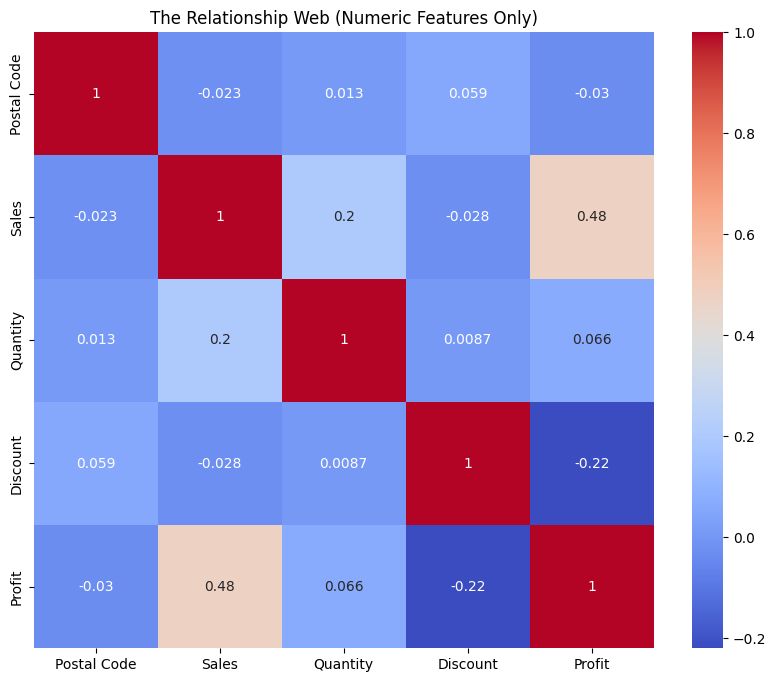

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('The Relationship Web (Numeric Features Only)')
plt.show()

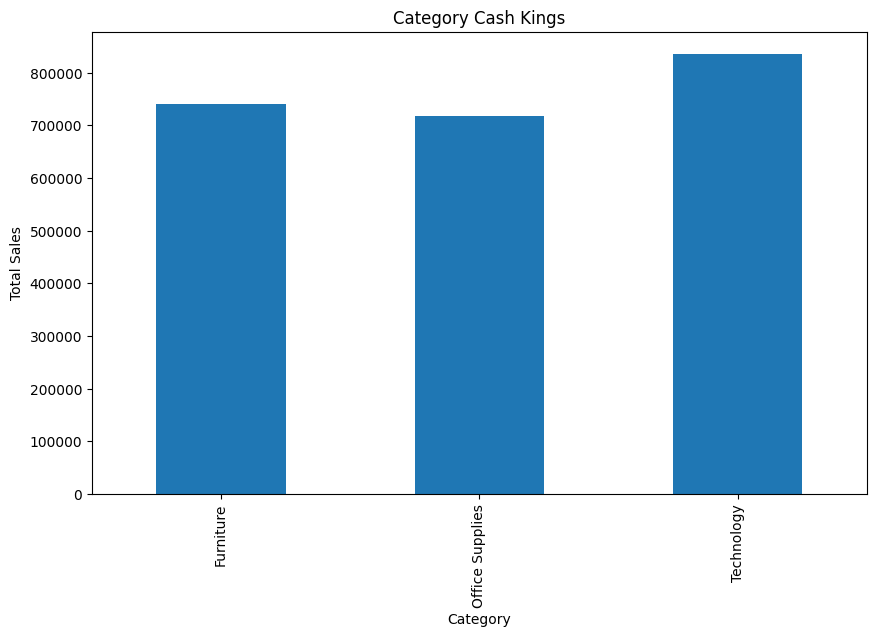

In [26]:
plt.figure(figsize=(10, 6))
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Category Cash Kings')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

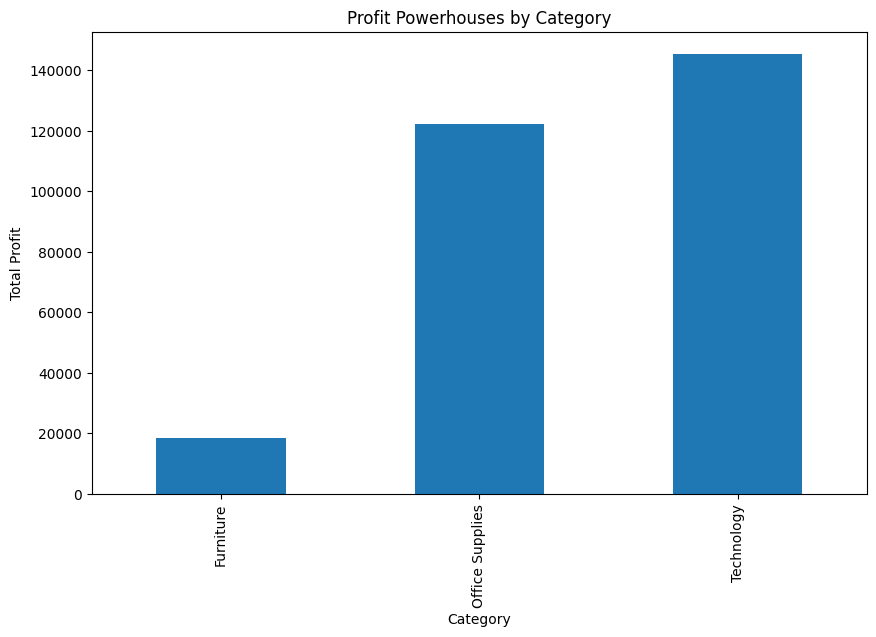

In [27]:
plt.figure(figsize=(10, 6))
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.title('Profit Powerhouses by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

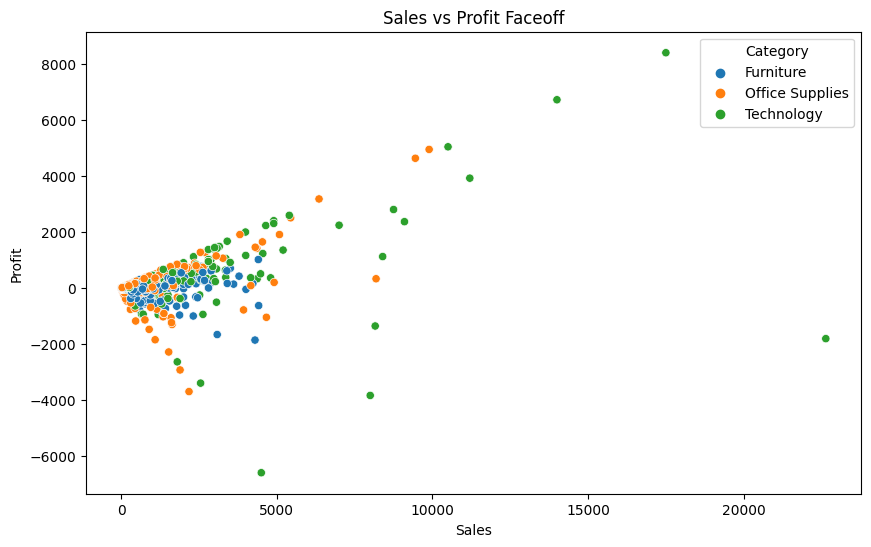

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit Faceoff')
plt.show()

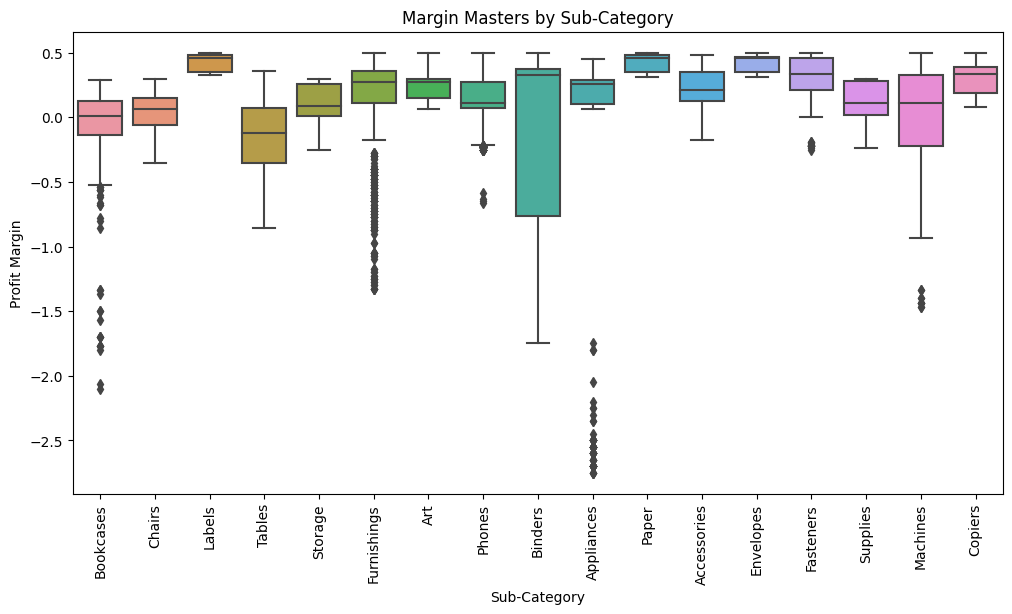

In [29]:
df['Profit Margin'] = df['Profit'] / df['Sales']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Profit Margin', data=df)
plt.title('Margin Masters by Sub-Category')
plt.xticks(rotation=90)
plt.show()

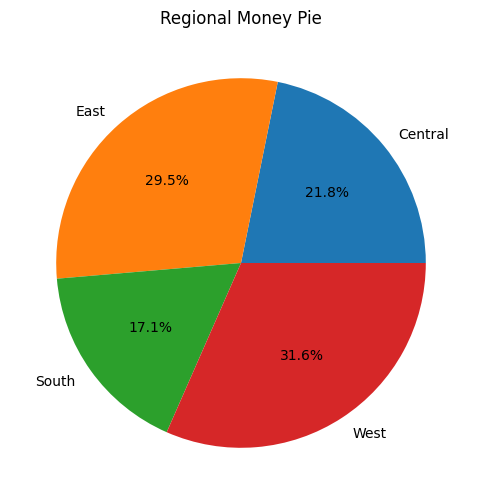

In [30]:
plt.figure(figsize=(10, 6))
df.groupby('Region')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Regional Money Pie')
plt.ylabel('')
plt.show()

In [31]:
# Identify products with negative profit
negative_profit = df[df['Profit'] < 0].groupby('Sub-Category')['Profit'].sum().sort_values()
print("Sub-Categories with Negative Profit:")
print(negative_profit)

Sub-Categories with Negative Profit:
Sub-Category
Binders       -38504.2594
Tables        -32412.1483
Machines      -30118.6682
Bookcases     -12152.2060
Chairs         -9868.7825
Appliances     -8629.6412
Phones         -7530.6235
Furnishings    -6490.9134
Storage        -6426.3038
Supplies       -3015.6219
Accessories     -930.6265
Fasteners        -33.1952
Name: Profit, dtype: float64


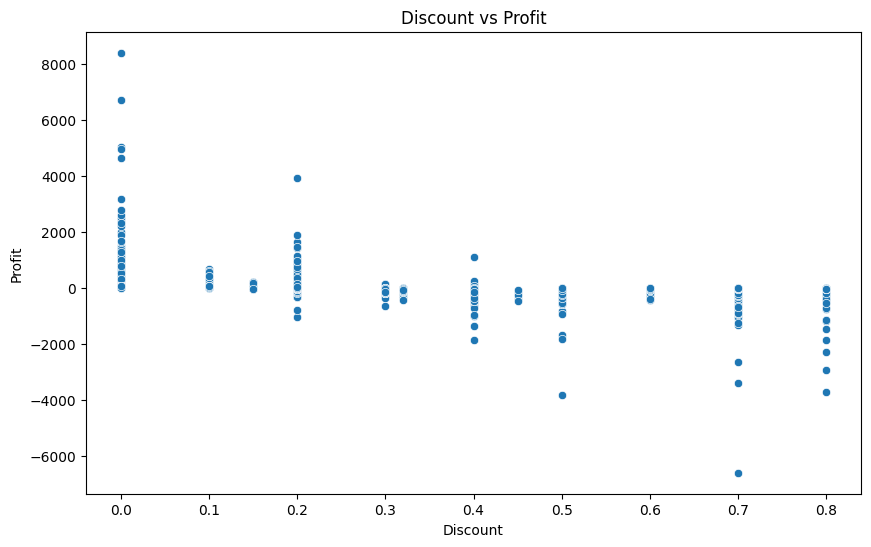

In [32]:
# Analyze discount impact on profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

In [33]:
# Identify states with lowest profit
state_profit = df.groupby('State')['Profit'].sum().sort_values()
print("\nStates with Lowest Profit:")
print(state_profit.head())


States with Lowest Profit:
State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Name: Profit, dtype: float64


In [34]:
# Analyze shipping mode profitability
ship_mode_profit = df.groupby('Ship Mode')['Profit'].mean().sort_values()
print("\nAverage Profit by Shipping Mode:")
print(ship_mode_profit)


Average Profit by Shipping Mode:
Ship Mode
Standard Class    27.534715
Same Day          29.283924
Second Class      29.565956
First Class       31.850134
Name: Profit, dtype: float64
